In [1]:
import sys
import os
import time

import numpy as np
import pandas as pd
import sklearn

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

# Let's check our software versions
print('------------')
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

def var_exists(var_name):
    return (var_name in globals() or var_name in locals())

------------
### Python version: 3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]
### NumPy version: 1.26.0
### Scikit-learn version: 1.2.1
------------


In [2]:
import requests

In [3]:
r = requests.get('https://swamplocksapi.azurewebsites.net/api/Financials/stocks')
r.status_code
#print(r.json())
### First in terminal we went to folder 'SwampLocksAPI' and ran 'dotnet run' then we copied the localhost url into the notebook command (in red in pic) then we ran it

200

In [4]:
df = pd.DataFrame(r.json())

In [5]:
#df.info()
df.head(8)

,ticker,sectorName,sector,dataEntries,articles,balanceSheets,cashFlowStatements,incomeStatements,earningStatements,stockSplits
0,A,Healthcare,None,[],[],[],[],[],[],[]
1,AAPL,Information Technology,None,[],[],[],[],[],[],[]
2,ABBV,Healthcare,None,[],[],[],[],[],[],[]
3,ABNB,Consumer Discretionary,None,[],[],[],[],[],[],[]
4,ABT,Healthcare,None,[],[],[],[],[],[],[]
5,ACGL,Financials,None,[],[],[],[],[],[],[]
6,ACN,Information Technology,None,[],[],[],[],[],[],[]
7,ADBE,Information Technology,None,[],[],[],[],[],[],[]


In [6]:
techTickers = []
for i in range(463):
    if df.iloc[i][1] == 'Information Technology':
        techTickers.append(df.iloc[i][0])
        #print(df.iloc[i][0])
techUrls = []
for t in techTickers:
    url = 'https://swamplocksapi.azurewebsites.net/api/Financials/stocks/' + t + '/data'
    techUrls.append(url)
r = requests.get('https://swamplocksapi.azurewebsites.net/api/Financials/stocks/AAPL/filtered_data')


In [7]:
print(len(techTickers))

69


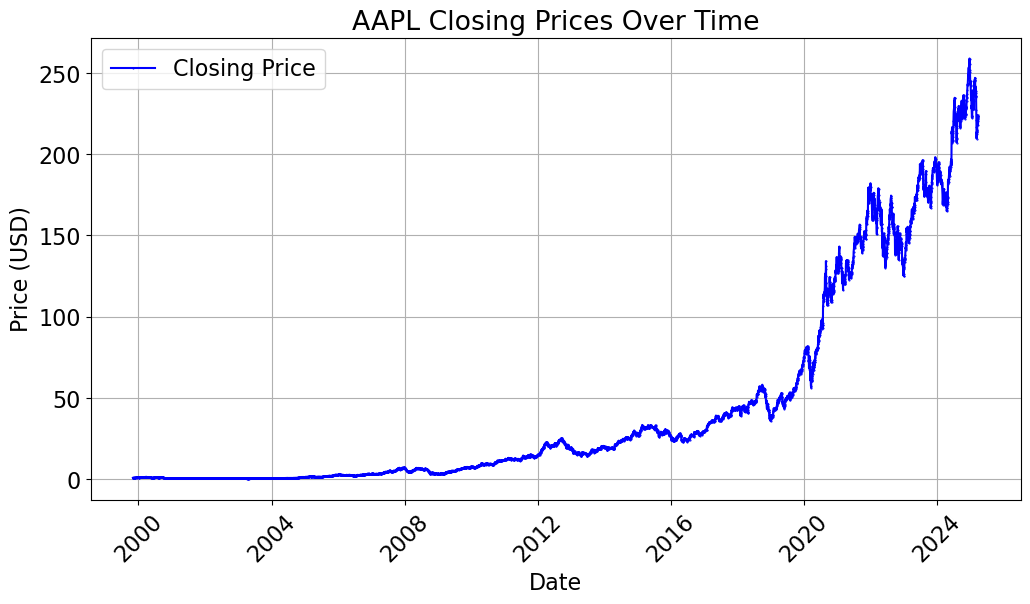

In [8]:
dfAAPLclose = pd.DataFrame(r.json())
dfAAPLclose['date'] = pd.to_datetime(dfAAPLclose['date'])

# Sort by date to ensure proper ordering
dfAAPLclose = dfAAPLclose.sort_values('date')

# Plotting the closing prices
plt.figure(figsize=(12, 6))
plt.plot(dfAAPLclose['date'], dfAAPLclose['closingPrice'], marker='o', linestyle='-', color='blue', label='Closing Price', markersize=0.5)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('AAPL Closing Prices Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

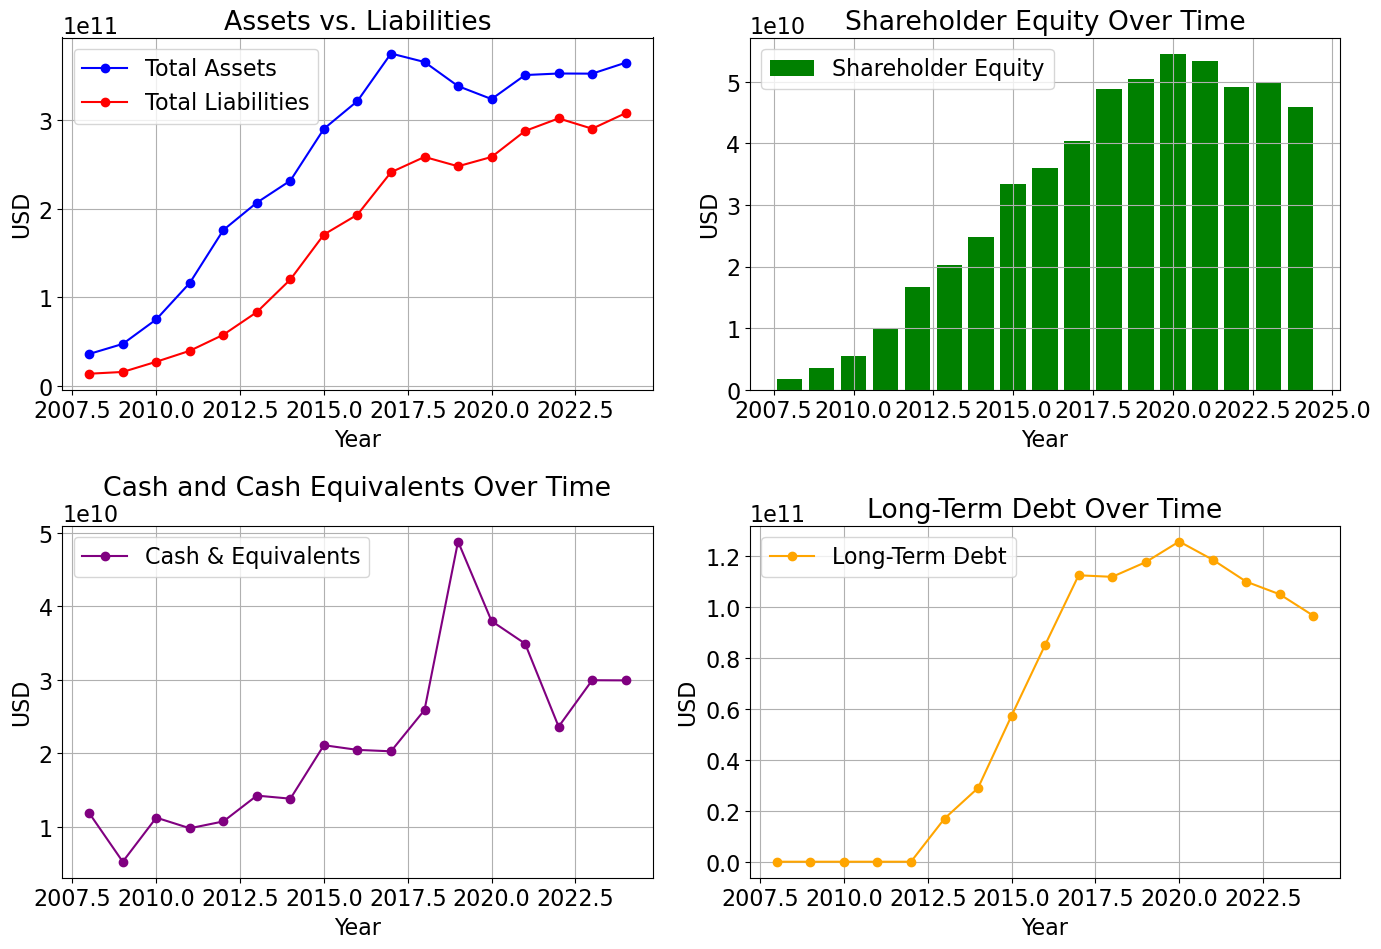

In [9]:
# https://swamplocksapi.azurewebsites.net/api/Financials
aaplbsURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/balancesheets/AAPL'
r = requests.get(aaplbsURL)
#print(r.json())
df = pd.DataFrame(r.json())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Plot 1: Total Assets vs. Total Liabilities
axes[0, 0].plot(df['fiscalYear'], df['totalAssets'], marker='o', label='Total Assets', color='blue')
axes[0, 0].plot(df['fiscalYear'], df['totalLiabilities'], marker='o', label='Total Liabilities', color='red')
axes[0, 0].set_title('Assets vs. Liabilities')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('USD')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Shareholder Equity
axes[0, 1].bar(df['fiscalYear'], df['totalShareholderEquity'], color='green', label='Shareholder Equity')
axes[0, 1].set_title('Shareholder Equity Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('USD')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Cash and Cash Equivalents
axes[1, 0].plot(df['fiscalYear'], df['cashAndCashEquivalents'], marker='o', label='Cash & Equivalents', color='purple')
axes[1, 0].set_title('Cash and Cash Equivalents Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('USD')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Long-Term Debt
axes[1, 1].plot(df['fiscalYear'], df['longTermDebt'], marker='o', label='Long-Term Debt', color='orange')
axes[1, 1].set_title('Long-Term Debt Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('USD')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [10]:
dfbs = pd.DataFrame(r.json())

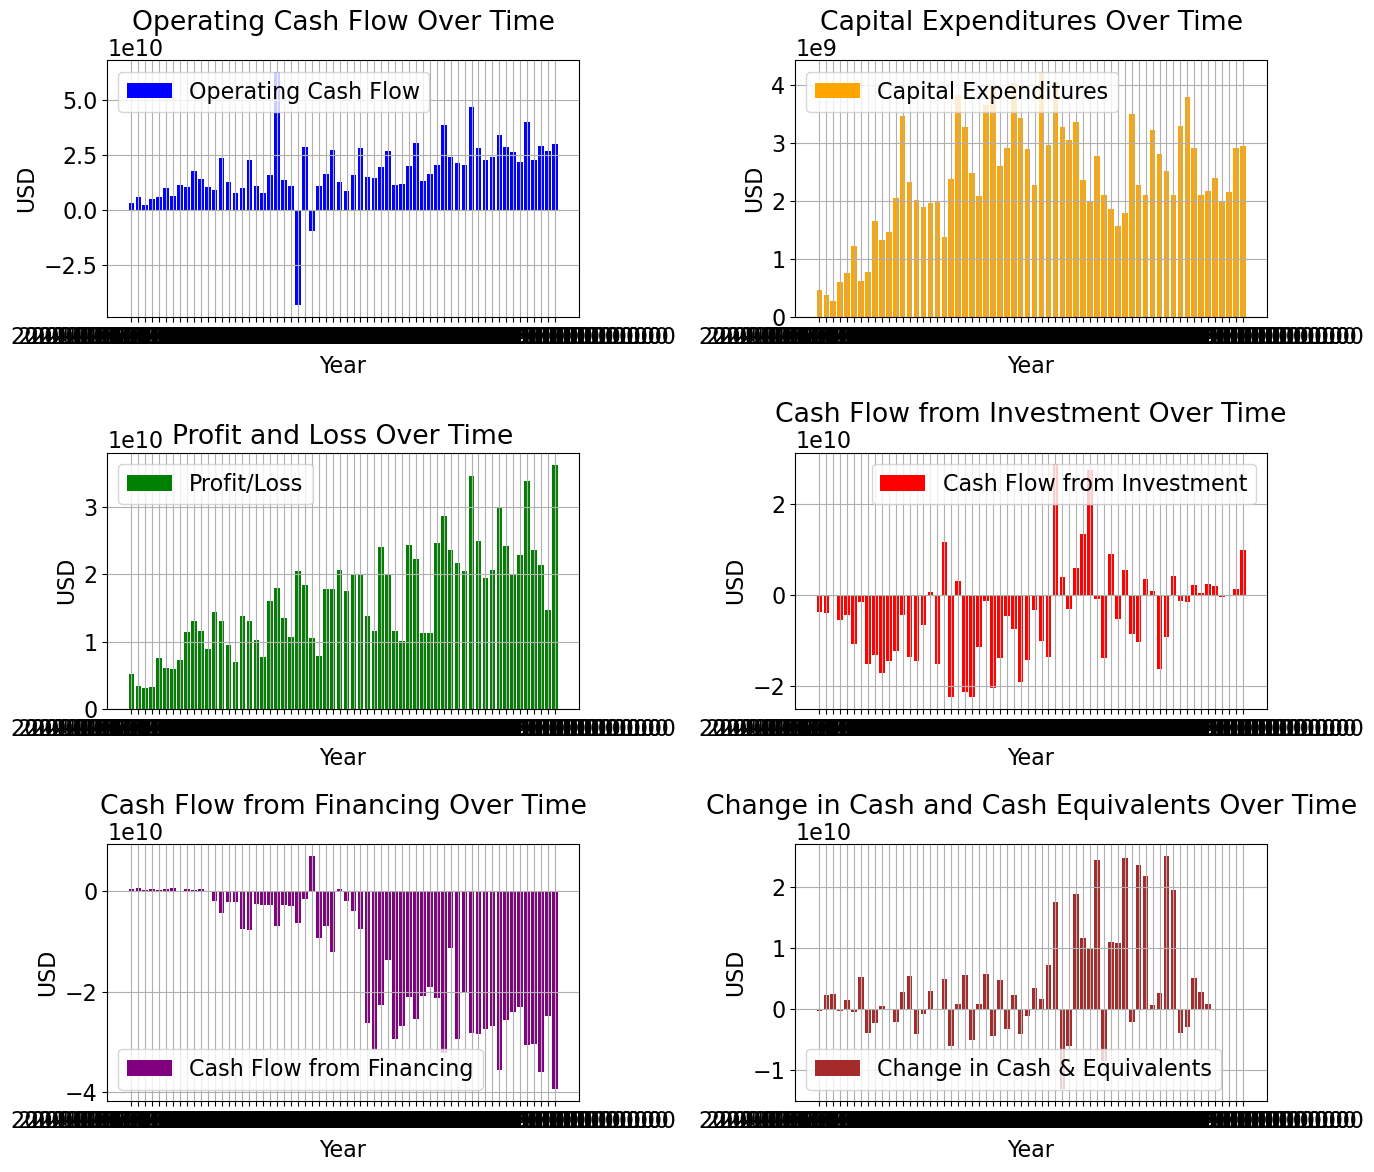

In [11]:
aaplcfURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/cashflowstatements/AAPL'
r = requests.get(aaplcfURL)
#print(r.json())
df = pd.DataFrame(r.json())
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # 3x2 grid of subplots

# Plot 1: Operating Cash Flow
axes[0, 0].bar(df['fiscalDateEnding'], df['operatingCashFlow'], color='blue', label='Operating Cash Flow')
axes[0, 0].set_title('Operating Cash Flow Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('USD')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Capital Expenditures
axes[0, 1].bar(df['fiscalDateEnding'], df['capitalExpenditures'], color='orange', label='Capital Expenditures')
axes[0, 1].set_title('Capital Expenditures Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('USD')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Profit/Loss
axes[1, 0].bar(df['fiscalDateEnding'], df['profitLoss'], color='green', label='Profit/Loss')
axes[1, 0].set_title('Profit and Loss Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('USD')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Cash Flow from Investment
axes[1, 1].bar(df['fiscalDateEnding'], df['cashFlowFromInvestment'], color='red', label='Cash Flow from Investment')
axes[1, 1].set_title('Cash Flow from Investment Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('USD')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Plot 5: Cash Flow from Financing
axes[2, 0].bar(df['fiscalDateEnding'], df['cashFlowFromFinancing'], color='purple', label='Cash Flow from Financing')
axes[2, 0].set_title('Cash Flow from Financing Over Time')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('USD')
axes[2, 0].legend()
axes[2, 0].grid(True)

# Plot 6: Change in Cash and Cash Equivalents
axes[2, 1].bar(df['fiscalDateEnding'], df['changeInCashAndCashEquivalents'], color='brown', label='Change in Cash & Equivalents')
axes[2, 1].set_title('Change in Cash and Cash Equivalents Over Time')
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('USD')
axes[2, 1].legend()
axes[2, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
dfcf = df

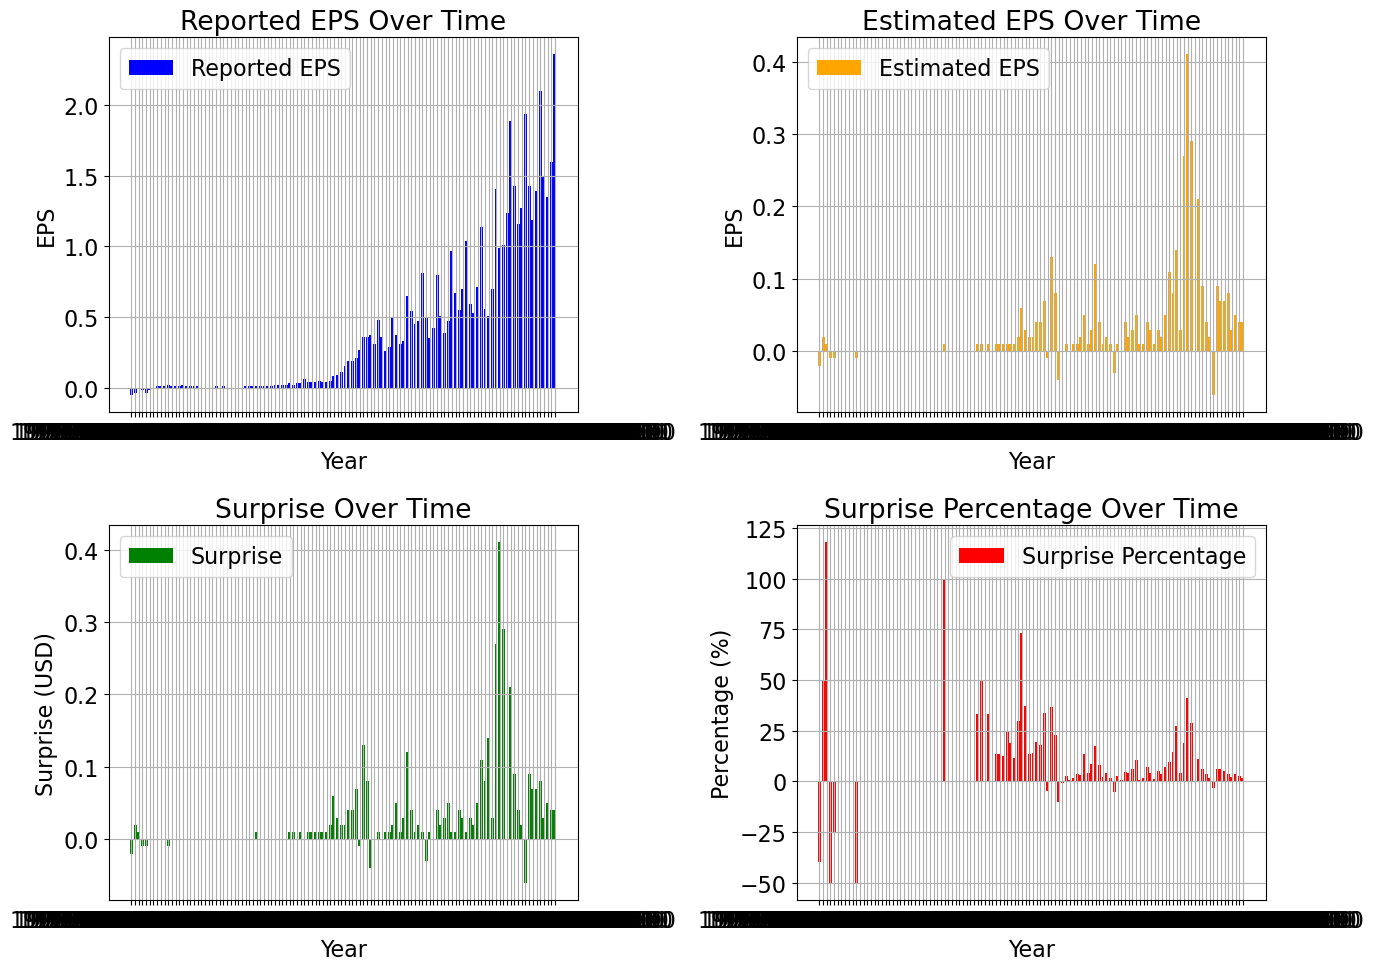

In [13]:
aapleURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/earnings/AAPL'
r = requests.get(aapleURL)
#print(r.json())
df = pd.DataFrame(r.json())
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Plot 1: Reported EPS
axes[0, 0].bar(df['fiscalDateEnding'], df['reportedEPS'], color='blue', label='Reported EPS')
axes[0, 0].set_title('Reported EPS Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('EPS')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Estimated EPS
axes[0, 1].bar(df['fiscalDateEnding'], df['estimatedEPS'], color='orange', label='Estimated EPS')
axes[0, 1].set_title('Estimated EPS Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('EPS')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Surprise
axes[1, 0].bar(df['fiscalDateEnding'], df['surprise'], color='green', label='Surprise')
axes[1, 0].set_title('Surprise Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Surprise (USD)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Surprise Percentage
axes[1, 1].bar(df['fiscalDateEnding'], df['suprisePercentage'], color='red', label='Surprise Percentage')
axes[1, 1].set_title('Surprise Percentage Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
dfe = df

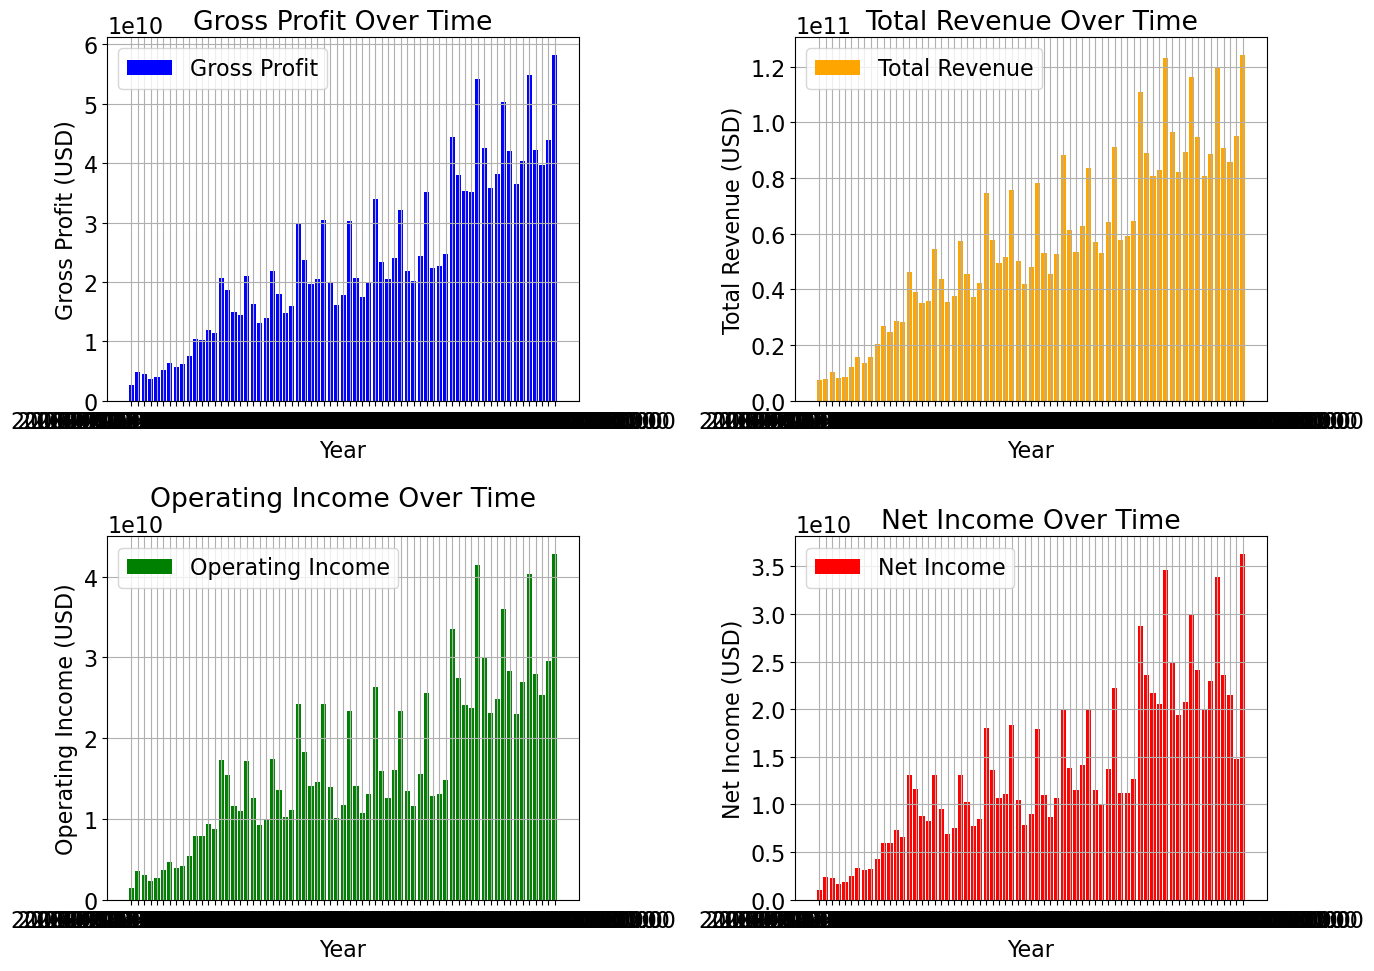

In [15]:
aaplisURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/incomestatements/AAPL'
r = requests.get(aaplisURL)
#print(r.json())
df = pd.DataFrame(r.json())
dfis = pd.DataFrame(r.json())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

# Plot 1: Gross Profit
axes[0, 0].bar(df['fiscalDateEnding'], df['grossProfit'], color='blue', label='Gross Profit')
axes[0, 0].set_title('Gross Profit Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Gross Profit (USD)')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot 2: Total Revenue
axes[0, 1].bar(df['fiscalDateEnding'], df['totalRevenue'], color='orange', label='Total Revenue')
axes[0, 1].set_title('Total Revenue Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Total Revenue (USD)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Operating Income
axes[1, 0].bar(df['fiscalDateEnding'], df['operatingIncome'], color='green', label='Operating Income')
axes[1, 0].set_title('Operating Income Over Time')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Operating Income (USD)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Net Income
axes[1, 1].bar(df['fiscalDateEnding'], df['netIncome'], color='red', label='Net Income')
axes[1, 1].set_title('Net Income Over Time')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Net Income (USD)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
print(dfis.head)

<bound method NDFrame.head of    ticker     fiscalDateEnding reportedCurrency   grossProfit  totalRevenue  \
0    AAPL  2008-06-30T00:00:00              USD  2.600000e+09  7.464000e+09   
1    AAPL  2008-09-30T00:00:00              USD  4.791000e+09  7.895000e+09   
2    AAPL  2008-12-31T00:00:00              USD  4.507000e+09  1.016700e+10   
3    AAPL  2009-03-31T00:00:00              USD  3.627000e+09  8.163000e+09   
4    AAPL  2009-06-30T00:00:00              USD  3.983000e+09  8.337000e+09   
..    ...                  ...              ...           ...           ...   
62   AAPL  2023-12-31T00:00:00              USD  5.485500e+10  1.195750e+11   
63   AAPL  2024-03-31T00:00:00              USD  4.227100e+10  9.075300e+10   
64   AAPL  2024-06-30T00:00:00              USD  3.967800e+10  8.577700e+10   
65   AAPL  2024-09-30T00:00:00              USD  4.387900e+10  9.493000e+10   
66   AAPL  2024-12-31T00:00:00              USD  5.827500e+10  1.243000e+11   

    costOfRevenue  co

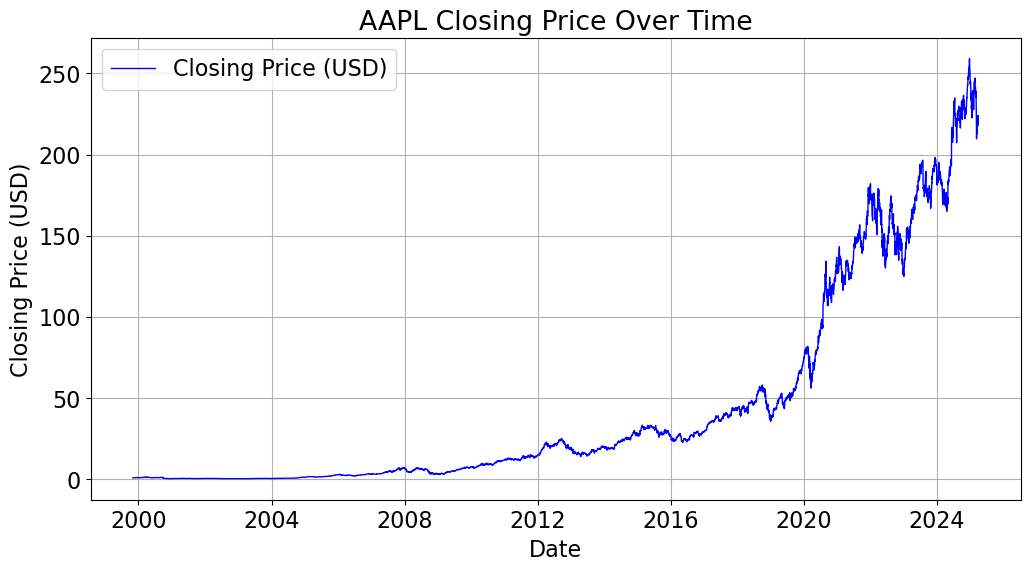

In [17]:
# in https://swamplocksapi.azurewebsites.net/api/Financials/balancesheets/AAPL commonStockSharesOutstanding
# closing price in https://swamplocksapi.azurewebsites.net/api/Financials/stocks/AAPL/data

# Assuming dfFinancials contains the financials data with outstanding shares
# Assuming dfAAPLclose contains the daily closing prices data

# 1. Convert dates to datetime format
dfAAPLclose['date'] = pd.to_datetime(dfAAPLclose['date'])

# 2. Merge the two DataFrames based on the fiscal year and the closing date
# Extract the fiscal year from the closing price date
dfAAPLclose['fiscalYear'] = dfAAPLclose['date'].dt.year

merged_df = dfAAPLclose

# 4. Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'], merged_df['closingPrice'], label='Closing Price (USD)', color='blue', linewidth=1)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('AAPL Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Display a sample of the merged data
# Select only the relevant columns
# Step 1: Detect potential splits by checking for large price drops
"""
split_min_threshold = 0.1  # Lower limit for split detection
split_max_threshold = 0.5  # Upper limit for split detection

# Identify possible split events
merged_df['price_ratio'] = merged_df['closingPrice'] / merged_df['closingPrice'].shift(1)
split_indices = merged_df[
    (merged_df['price_ratio'] < split_max_threshold) & (merged_df['price_ratio'] > split_min_threshold)
].index

# Step 2: Apply split corrections iteratively
split_detected = False

for idx in split_indices:
    split_ratio = round(1 / merged_df.loc[idx, 'price_ratio'])  # Approximate the split ratio
    if split_ratio >= 2:  # Avoid false positives
        merged_df.loc[idx:, 'commonStockSharesOutstanding'] *= split_ratio
        print(f"✅ Detected split at {merged_df.loc[idx, 'date']} with ratio ~1/{split_ratio}")
        split_detected = True

# Step 3: Recalculate the closing price
merged_df['marketCap'] = merged_df['closingPrice'] * merged_df['commonStockSharesOutstanding']

# Step 4: Plot the corrected closing price
plt.figure(figsize=(14, 6))
plt.plot(merged_df['date'], merged_df['marketCap'], label='closing price (Adjusted)', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('closing price (USD)')
plt.title('Apple closing price (Adjusted for Stock Splits)')
plt.grid(True)
plt.legend()
plt.show()

if not split_detected:
    print("❌ No stock splits detected. Try lowering the threshold or manually inspecting the data.")
"""

'\nsplit_min_threshold = 0.1  # Lower limit for split detection\nsplit_max_threshold = 0.5  # Upper limit for split detection\n\n# Identify possible split events\nmerged_df[\'price_ratio\'] = merged_df[\'closingPrice\'] / merged_df[\'closingPrice\'].shift(1)\nsplit_indices = merged_df[\n    (merged_df[\'price_ratio\'] < split_max_threshold) & (merged_df[\'price_ratio\'] > split_min_threshold)\n].index\n\n# Step 2: Apply split corrections iteratively\nsplit_detected = False\n\nfor idx in split_indices:\n    split_ratio = round(1 / merged_df.loc[idx, \'price_ratio\'])  # Approximate the split ratio\n    if split_ratio >= 2:  # Avoid false positives\n        merged_df.loc[idx:, \'commonStockSharesOutstanding\'] *= split_ratio\n        print(f"✅ Detected split at {merged_df.loc[idx, \'date\']} with ratio ~1/{split_ratio}")\n        split_detected = True\n\n# Step 3: Recalculate the closing price\nmerged_df[\'marketCap\'] = merged_df[\'closingPrice\'] * merged_df[\'commonStockSharesOutstand

In [19]:

#print(merged_df[['date', 'fiscalYear', 'closingPrice', 'commonStockSharesOutstanding', 'marketCap']].to_string(index=False))
date_closing_price_df = merged_df[['date', 'closingPrice']]
print(date_closing_price_df)

           date  closingPrice
0    1999-11-01      0.693036
1    1999-11-02      0.716518
2    1999-11-03      0.727679
3    1999-11-04      0.746607
4    1999-11-05      0.788482
...         ...           ...
6389 2025-03-27    223.850000
6390 2025-03-28    217.900000
6391 2025-03-31    222.130000
6392 2025-04-01    223.190000
6393 2025-04-02    223.890000

[6394 rows x 2 columns]


In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to numerical format for regression
merged_df['date_ordinal'] = merged_df['date'].apply(lambda x: x.toordinal())
merged_df['closingPrice'] = merged_df['closingPrice'].ffill().bfill()
# Prepare X (dates) and y (closing price) for regression
X = merged_df['date_ordinal'].values.reshape(-1, 1)  # Independent variable (dates)
y = merged_df['closingPrice'].values.reshape(-1, 1)      # Dependent variable (closing price)


In [21]:
# Check for NaNs
print(merged_df['closingPrice'].isna().sum())
# Fill NaNs with forward fill, then backward fill
print(y)



0
[[  0.69303571]
 [  0.71651786]
 [  0.72767857]
 ...
 [222.13      ]
 [223.19      ]
 [223.89      ]]


In [22]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate trend line predictions for existing dates
y_pred = model.predict(X)


In [23]:
# Project into the future (e.g., 365 days ahead)
future_days = 365
last_date = merged_df['date'].max()
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_days + 1)]
future_ordinals = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)

# Make future predictions
future_predictions = model.predict(future_ordinals)

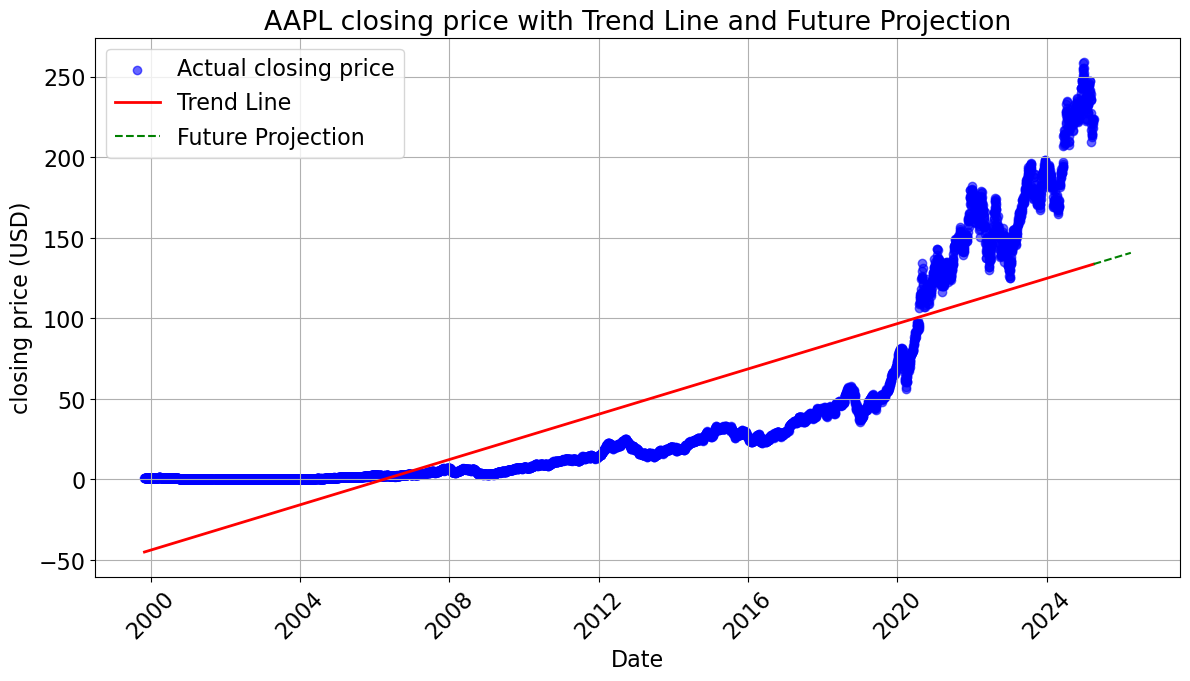

In [24]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.figure(figsize=(14, 7))
plt.scatter(merged_df['date'], merged_df['closingPrice'], color='blue', label='Actual closing price', alpha=0.6)

# Plot the trend line
plt.plot(merged_df['date'], y_pred, color='red', label='Trend Line', linewidth=2)

# Plot the future projection
plt.plot(future_dates, future_predictions, color='green', linestyle='dashed', label='Future Projection')

# Labels and legend
plt.title('AAPL closing price with Trend Line and Future Projection')
plt.xlabel('Date')
plt.ylabel('closing price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from sklearn.model_selection import train_test_split

# Assuming `merged_df` contains the closing price data with the date column
# Convert date to pandas datetime format if it's not already
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Sort the data by date in chronological order
merged_df = merged_df.sort_values('date')

# Split the data into train, validation, and test
train_size = int(0.7 * len(merged_df))  # 70% for training
val_size = int(0.15 * len(merged_df))   # 15% for validation
test_size = len(merged_df) - train_size - val_size  # remaining 15% for testing

train_data = merged_df[:train_size]
validation_data = merged_df[train_size:train_size+val_size]
test_data = merged_df[train_size+val_size:]

# Check the sizes of the splits
print(f'Train data size: {len(train_data)}')
print(f'Validation data size: {len(validation_data)}')
print(f'Test data size: {len(test_data)}')

Train data size: 4475
Validation data size: 959
Test data size: 960


In [26]:
print(merged_df.shape)
df_closing_price = merged_df[['date', 'closingPrice']].copy()

(6394, 9)


In [27]:
# ✅ Ensure datetime consistency
dfcf['fiscalDateEnding'] = pd.to_datetime(dfcf['fiscalDateEnding'])
df_closing_price['date'] = pd.to_datetime(df_closing_price['date'])

# ✅ Create next quarter end date
dfcf['nextQuarterEnd'] = dfcf['fiscalDateEnding'] + pd.DateOffset(months=3)

# ✅ Sort both DataFrames by date
dfcf = dfcf.sort_values('nextQuarterEnd')
df_closing_price = df_closing_price.sort_values('date')

# ✅ Use merge_asof with tolerance to avoid incorrect repeated mapping
final_data = pd.merge_asof(
    dfcf,
    df_closing_price,
    left_on='nextQuarterEnd',
    right_on='date',
    direction='forward',
    tolerance=pd.Timedelta("30 days")  # Allow up to 30 days difference
)

# ✅ Filter out mismatched rows (NaNs)
final_data = final_data.dropna(subset=['closingPrice']).reset_index(drop=True)

# ✅ Check results
print("\nFinal merged data sample:")
print(final_data[['fiscalDateEnding', 'nextQuarterEnd', 'date', 'closingPrice']].head())



Final merged data sample:
  fiscalDateEnding nextQuarterEnd       date  closingPrice
0       2009-09-30     2009-12-30 2009-12-30      7.558571
1       2009-12-31     2010-03-31 2010-03-31      8.392857
2       2010-03-31     2010-06-30 2010-06-30      8.983214
3       2010-06-30     2010-09-30 2010-09-30     10.133929
4       2010-09-30     2010-12-30 2010-12-30     11.559286


In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = final_data.drop(columns=['closingPrice', 'fiscalDateEnding', 'nextQuarterEnd', 'date'])
y = final_data['closingPrice']

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Display the shapes of the resulting sets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')


Training set: (37, 30), (37,)
Validation set: (12, 30), (12,)
Test set: (13, 30), (13,)


In [29]:
from sklearn.preprocessing import StandardScaler
# ✅ Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include='object').columns

# ✅ Drop non-numeric columns
X_train_numeric = X_train.drop(columns=non_numeric_cols)
X_val_numeric = X_val.drop(columns=non_numeric_cols)
X_test_numeric = X_test.drop(columns=non_numeric_cols)

# ✅ Check for NaNs
print("\nNaN count before imputation:")
print(f"Train: {X_train_numeric.isna().sum().sum()}, Val: {X_val_numeric.isna().sum().sum()}, Test: {X_test_numeric.isna().sum().sum()}")

# ✅ Option 1: Impute NaNs with the mean of each column
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_val_numeric.fillna(X_train_numeric.mean(), inplace=True)  # Use train mean for val/test
X_test_numeric.fillna(X_train_numeric.mean(), inplace=True)

# ✅ Verify NaN handling
print("\nNaN count after imputation:")
print(f"Train: {X_train_numeric.isna().sum().sum()}, Val: {X_val_numeric.isna().sum().sum()}, Test: {X_test_numeric.isna().sum().sum()}")

# ✅ Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val_numeric)
X_test_scaled = scaler.transform(X_test_numeric)



NaN count before imputation:
Train: 0, Val: 0, Test: 0

NaN count after imputation:
Train: 0, Val: 0, Test: 0


In [30]:
# ✅ Convert scaled arrays back to DataFrames for readability
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)
X_val_df = pd.DataFrame(X_val_scaled, columns=X_val_numeric.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns)

# ✅ Add the target closing price values for reference
X_train_df['Target_closingPrice'] = y_train.values
X_val_df['Target_closingPrice'] = y_val.values
X_test_df['Target_closingPrice'] = y_test.values



In [31]:
print(y_train.head(8))

52    129.930000
36     39.435000
53    164.900000
41     63.572500
58    216.750000
15     17.026786
40     72.880000
27     28.262500
Name: closingPrice, dtype: float64


/var/folders/8g/_56q3nhs07g6dmqp43hb7tqc0000gn/T/ipykernel_28635/1356947343.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_with_target.corr()


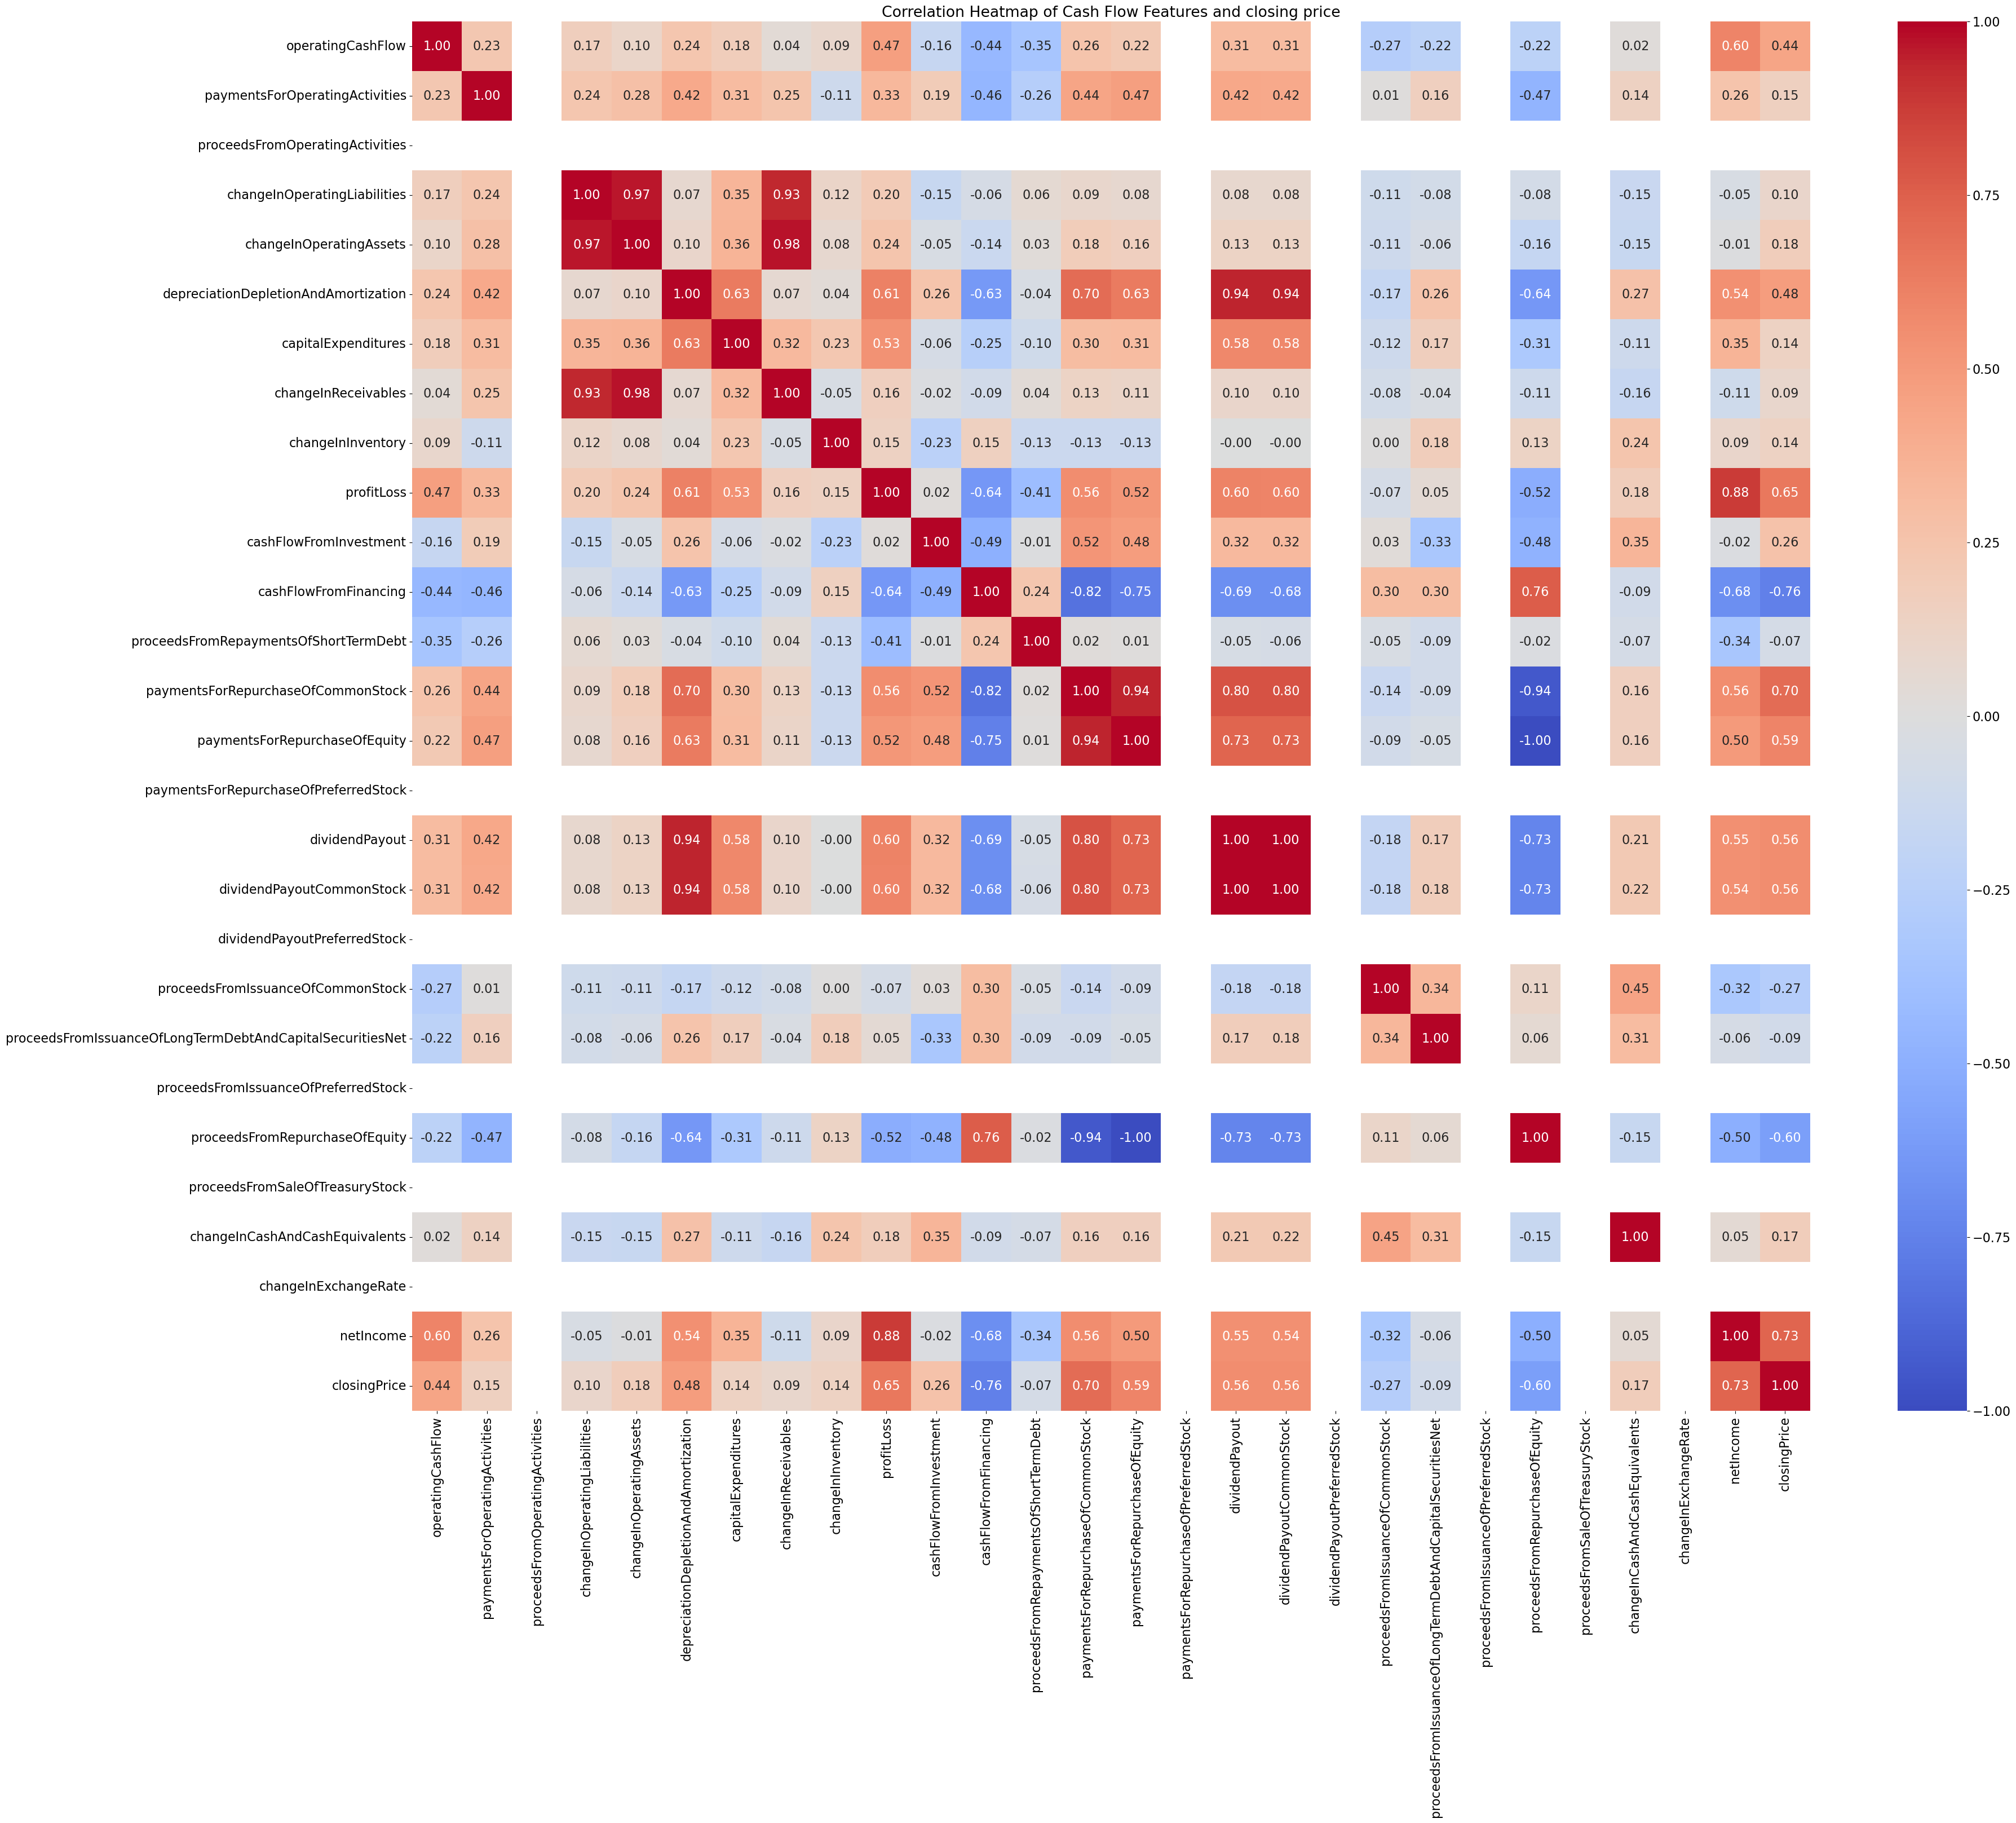

Correlations with closingPrice:
closingPrice                                                 1.000000
netIncome                                                    0.732469
paymentsForRepurchaseOfCommonStock                           0.700010
profitLoss                                                   0.650648
paymentsForRepurchaseOfEquity                                0.594465
dividendPayout                                               0.559338
dividendPayoutCommonStock                                    0.558083
depreciationDepletionAndAmortization                         0.481082
operatingCashFlow                                            0.439877
cashFlowFromInvestment                                       0.260997
changeInOperatingAssets                                      0.176714
changeInCashAndCashEquivalents                               0.174877
paymentsForOperatingActivities                               0.152464
changeInInventory                                         

In [32]:

import seaborn as sns
import matplotlib.pyplot as plt

data_with_target = X_train.copy()
data_with_target['closingPrice'] = y_train

# Calculate correlation matrix
correlation_matrix = data_with_target.corr()

# Create heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Cash Flow Features and closing price')
plt.show()

# Print correlations with MarketCap
print("Correlations with closingPrice:")
print(correlation_matrix['closingPrice'].sort_values(ascending=False))

In [33]:
print(dfe.head(8))

  ticker     fiscalDateEnding         reportedDate  reportedEPS  estimatedEPS  \
0   AAPL  1996-03-31T00:00:00  1996-04-17T00:00:00        -0.05         -0.02   
1   AAPL  1996-06-30T00:00:00  1996-07-17T00:00:00        -0.04          0.02   
2   AAPL  1996-09-30T00:00:00  1996-10-16T00:00:00        -0.01          0.01   
3   AAPL  1996-12-31T00:00:00  1997-01-15T00:00:00        -0.02         -0.01   
4   AAPL  1997-03-31T00:00:00  1997-04-16T00:00:00        -0.04         -0.01   
5   AAPL  1997-06-30T00:00:00  1997-07-16T00:00:00        -0.02          0.00   
6   AAPL  1997-09-30T00:00:00  1997-10-15T00:00:00         0.00          0.00   
7   AAPL  1997-12-31T00:00:00  1998-01-14T00:00:00         0.01          0.00   

   surprise  suprisePercentage  reportTime stock  
0     -0.02              -40.0  pre-market  None  
1      0.02               50.0  pre-market  None  
2      0.01              118.0  pre-market  None  
3     -0.01              -50.0  pre-market  None  
4     -0.01    

In [34]:
from sklearn.model_selection import train_test_split

# ✅ Ensure datetime consistency
dfe['fiscalDateEnding'] = pd.to_datetime(dfe['fiscalDateEnding'])
dfe['reportedDate'] = pd.to_datetime(dfe['reportedDate'])
df_closing_price['date'] = pd.to_datetime(df_closing_price['date'])

# ✅ Create next quarter end date (approximation)
dfe['nextQuarterEnd'] = dfe['fiscalDateEnding'] + pd.DateOffset(months=3)

# ✅ Sort both DataFrames by date
dfe = dfe.sort_values('nextQuarterEnd')
df_closing_price = df_closing_price.sort_values('date')

# ✅ Use merge_asof with tolerance to avoid incorrect repeated mapping
final_data = pd.merge_asof(
    dfe,
    df_closing_price,
    left_on='nextQuarterEnd',
    right_on='date',
    direction='forward',
    tolerance=pd.Timedelta("30 days")  # Allow up to 30 days difference
)

# ✅ Filter out mismatched rows (NaNs)
final_data = final_data.dropna(subset=['closingPrice']).reset_index(drop=True)

# ✅ Check results
print("\nFinal merged data sample:")
print(final_data[['fiscalDateEnding', 'nextQuarterEnd', 'date', 'closingPrice']].head())

# Define features (X) and target (y)
X = final_data.drop(columns=['closingPrice', 'fiscalDateEnding', 'nextQuarterEnd', 'date', 'ticker', 'stock'])
y = final_data['closingPrice']

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Display the shapes of the resulting sets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')



Final merged data sample:
  fiscalDateEnding nextQuarterEnd       date  closingPrice
0       1999-09-30     1999-12-30 1999-12-30      0.895625
1       1999-12-31     2000-03-31 2000-03-31      1.212589
2       2000-03-31     2000-06-30 2000-06-30      0.935357
3       2000-06-30     2000-09-30 2000-10-02      0.433036
4       2000-09-30     2000-12-30 2001-01-02      0.265714
Training set: (61, 6), (61,)
Validation set: (20, 6), (20,)
Test set: (21, 6), (21,)


/var/folders/8g/_56q3nhs07g6dmqp43hb7tqc0000gn/T/ipykernel_28635/340907825.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_with_target.corr()


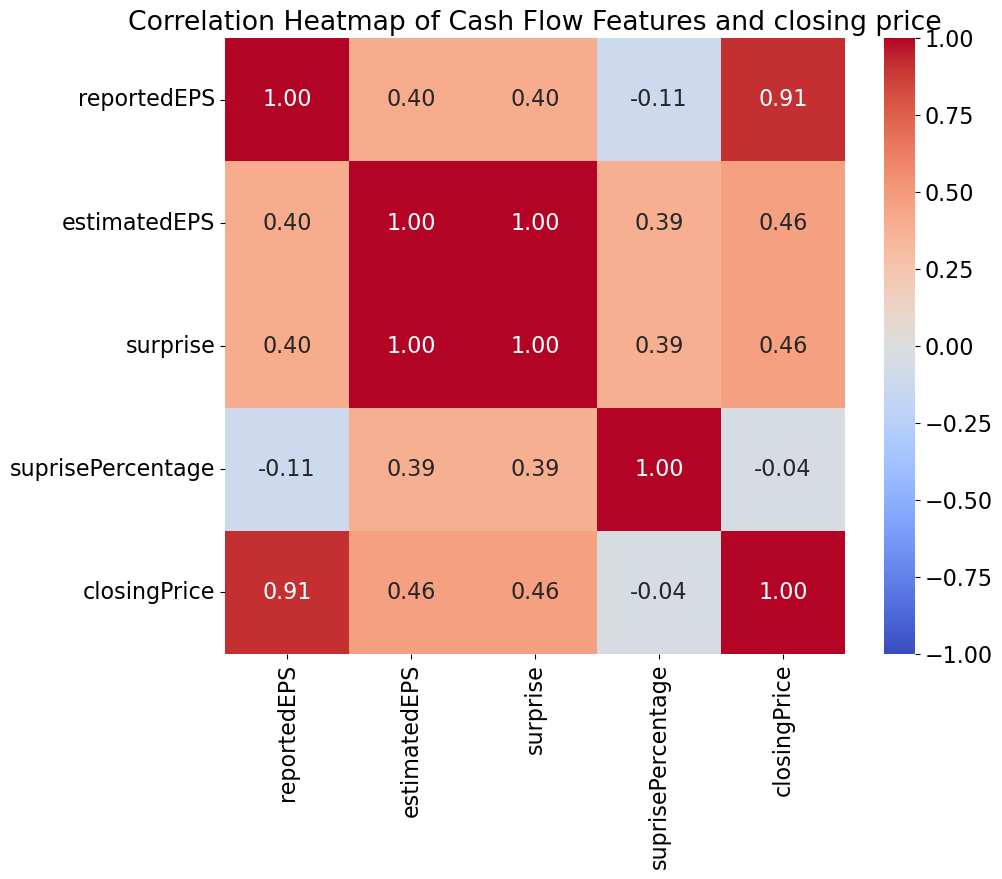

Correlations with MarketCap:
closingPrice         1.000000
reportedEPS          0.908376
estimatedEPS         0.462740
surprise             0.462740
suprisePercentage   -0.041966
Name: closingPrice, dtype: float64


In [35]:
"""
Training set: (34, 30), (34,)
Validation set: (11, 30), (11,)
Test set: (12, 30), (12,)
"""


import seaborn as sns
import matplotlib.pyplot as plt

data_with_target = X_train.copy()
data_with_target['closingPrice'] = y_train

# Calculate correlation matrix
correlation_matrix = data_with_target.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Cash Flow Features and closing price')
plt.show()

# Print correlations with MarketCap
print("Correlations with MarketCap:")
print(correlation_matrix['closingPrice'].sort_values(ascending=False))

In [36]:
print(dfis.head)

<bound method NDFrame.head of    ticker     fiscalDateEnding reportedCurrency   grossProfit  totalRevenue  \
0    AAPL  2008-06-30T00:00:00              USD  2.600000e+09  7.464000e+09   
1    AAPL  2008-09-30T00:00:00              USD  4.791000e+09  7.895000e+09   
2    AAPL  2008-12-31T00:00:00              USD  4.507000e+09  1.016700e+10   
3    AAPL  2009-03-31T00:00:00              USD  3.627000e+09  8.163000e+09   
4    AAPL  2009-06-30T00:00:00              USD  3.983000e+09  8.337000e+09   
..    ...                  ...              ...           ...           ...   
62   AAPL  2023-12-31T00:00:00              USD  5.485500e+10  1.195750e+11   
63   AAPL  2024-03-31T00:00:00              USD  4.227100e+10  9.075300e+10   
64   AAPL  2024-06-30T00:00:00              USD  3.967800e+10  8.577700e+10   
65   AAPL  2024-09-30T00:00:00              USD  4.387900e+10  9.493000e+10   
66   AAPL  2024-12-31T00:00:00              USD  5.827500e+10  1.243000e+11   

    costOfRevenue  co

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Ensure datetime consistency
dfe['fiscalDateEnding'] = pd.to_datetime(dfe['fiscalDateEnding'])
dfcf['fiscalDateEnding'] = pd.to_datetime(dfcf['fiscalDateEnding'])
dfis['fiscalDateEnding'] = pd.to_datetime(dfis['fiscalDateEnding'])
df_closing_price['date'] = pd.to_datetime(df_closing_price['date'])

# Create next quarter end date
dfe['nextQuarterEnd'] = dfe['fiscalDateEnding'] + pd.DateOffset(months=3)
dfcf['nextQuarterEnd'] = dfcf['fiscalDateEnding'] + pd.DateOffset(months=3)
dfis['nextQuarterEnd'] = dfis['fiscalDateEnding'] + pd.DateOffset(months=3)

# Sort by date
dfe = dfe.sort_values('nextQuarterEnd')
dfcf = dfcf.sort_values('nextQuarterEnd')
dfis = dfis.sort_values('nextQuarterEnd')
df_closing_price = df_closing_price.sort_values('date')

merged_financials = pd.merge(
    dfe[['ticker', 'fiscalDateEnding', 'nextQuarterEnd', 'reportedEPS']],
    dfcf[['ticker', 'fiscalDateEnding', 'netIncome', 'paymentsForRepurchaseOfCommonStock', 'profitLoss']],
    on=['ticker', 'fiscalDateEnding'],
    how='inner'
)

# now merge the result with dfis
merged_financials = pd.merge(
    merged_financials,
    dfis[['ticker', 'fiscalDateEnding', 'researchAndDevelopment', 'operatingExpenses', 'sellingGeneralAndAdministrative']],
    on=['ticker', 'fiscalDateEnding'],
    how='inner'
)

# Merge with closing price using merge_asof
final_data = pd.merge_asof(
    merged_financials,
    df_closing_price,
    left_on='nextQuarterEnd',
    right_on='date',
    direction='forward',
    tolerance=pd.Timedelta("30 days")
)

# Filter out rows without marketCap
final_data = final_data.dropna(subset=['closingPrice']).reset_index(drop=True)
"""
researchAndDevelopment               0.953399
operatingExpenses                    0.935023
sellingGeneralAndAdministrative      0.891001
"""
# Define features (X) and target (y)  cashFlowFromFinancing paymentsForRepurchaseOfEquity
features = ['reportedEPS', 'netIncome', 'paymentsForRepurchaseOfCommonStock', 
            'profitLoss',
            'researchAndDevelopment', 'operatingExpenses', 'sellingGeneralAndAdministrative']
X = final_data[features]
y = final_data['closingPrice']

# Verify shapes
print("X shape:", X.shape)  #
print("y shape:", y.shape)  # 

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display shapes
print(f'Training set: {X_train.shape}, {y_train.shape}')  # (34, 5), (34,)
print(f'Validation set: {X_val.shape}, {y_val.shape}')  # (11, 5), (11,)
print(f'Test set: {X_test.shape}, {y_test.shape}')      # (12, 5), (12,)

X shape: (62, 7)
y shape: (62,)
Training set: (37, 7), (37,)
Validation set: (12, 7), (12,)
Test set: (13, 7), (13,)


In [41]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Log-transform y
y_log = np.log1p(y)

# Split data
X_train, X_temp, y_train_log, y_temp_log = train_test_split(X, y_log, test_size=0.4, random_state=42)
X_val, X_test, y_val_log, y_test_log = train_test_split(X_temp, y_temp_log, test_size=0.5, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Grid search for SVR
param_grid = {
    'C': [10, 100, 1000],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}
svm = SVR()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_log)

# Best model
best_svm = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)

# Predict and evaluate on log scale
y_val_pred_log = best_svm.predict(X_val_scaled)
val_mse_log = mean_squared_error(y_val_log, y_val_pred_log)
print(f"Validation MSE (log scale): {val_mse_log}")

y_test_pred_log = best_svm.predict(X_test_scaled)
test_mse_log = mean_squared_error(y_test_log, y_test_pred_log)
print(f"Test MSE (log scale): {test_mse_log}")

# Convert back to original scale
y_val_pred = np.expm1(y_val_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
val_mse = mean_squared_error(np.expm1(y_val_log), y_val_pred)
test_mse = mean_squared_error(np.expm1(y_test_log), y_test_pred)
print(f"Validation MSE (original scale): {val_mse}")
print(f"Test MSE (original scale): {test_mse}")

Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Validation MSE (log scale): 0.015095776818325586
Test MSE (log scale): 0.03987756655749405
Validation MSE (original scale): 191.21461161683396
Test MSE (original scale): 524.6287594191847


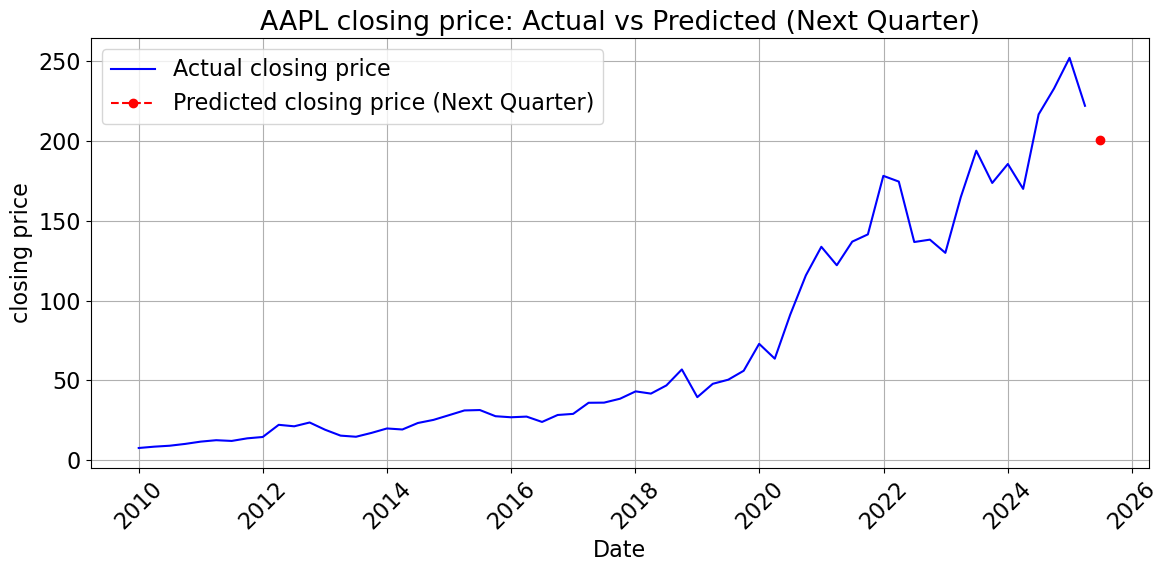

Predicted closing price for 2025-06-30: 200.91


In [42]:
# Assume latest quarter data from your dataset (e.g., last row of X)
historical_dates = final_data['date']  # Real dates from df_closing_price
historical_mcap = final_data['closingPrice']  # Real closing prices

# Latest data for prediction (last row of X)
latest_data = X.iloc[-1].to_frame().T

# Scale and predict for next 2 quarters
future_quarters = 1
future_X = pd.DataFrame([latest_data.values[0]] * future_quarters, columns=features)
future_X_scaled = scaler.transform(future_X)
future_log_preds = best_svm.predict(future_X_scaled)
future_mcap_preds = np.expm1(future_log_preds)

# Future dates (next 2 quarters from last historical date)
future_dates = pd.date_range(start=historical_dates.iloc[-1], periods=future_quarters + 1, freq='Q')[1:]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(historical_dates, historical_mcap, label='Actual closing price', color='blue')
plt.plot(future_dates, future_mcap_preds, label='Predicted closing price (Next Quarter)', 
         color='red', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('closing price')
plt.title('AAPL closing price: Actual vs Predicted (Next Quarter)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print predictions
for i, (date, pred) in enumerate(zip(future_dates, future_mcap_preds)):
    print(f"Predicted closing price for {date.strftime('%Y-%m-%d')}: {pred:.2f}")
    

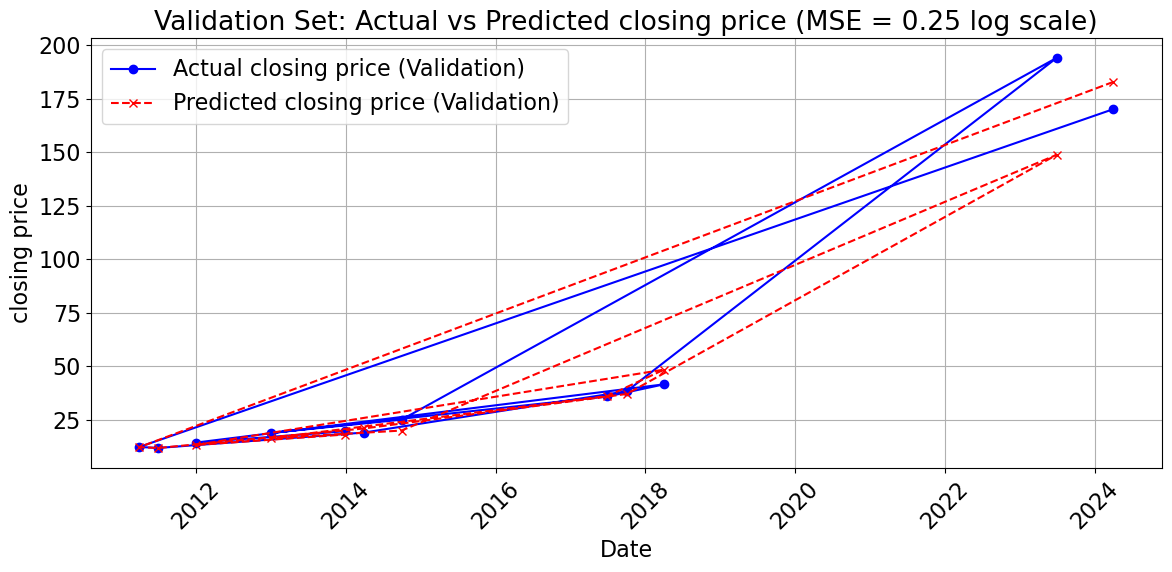

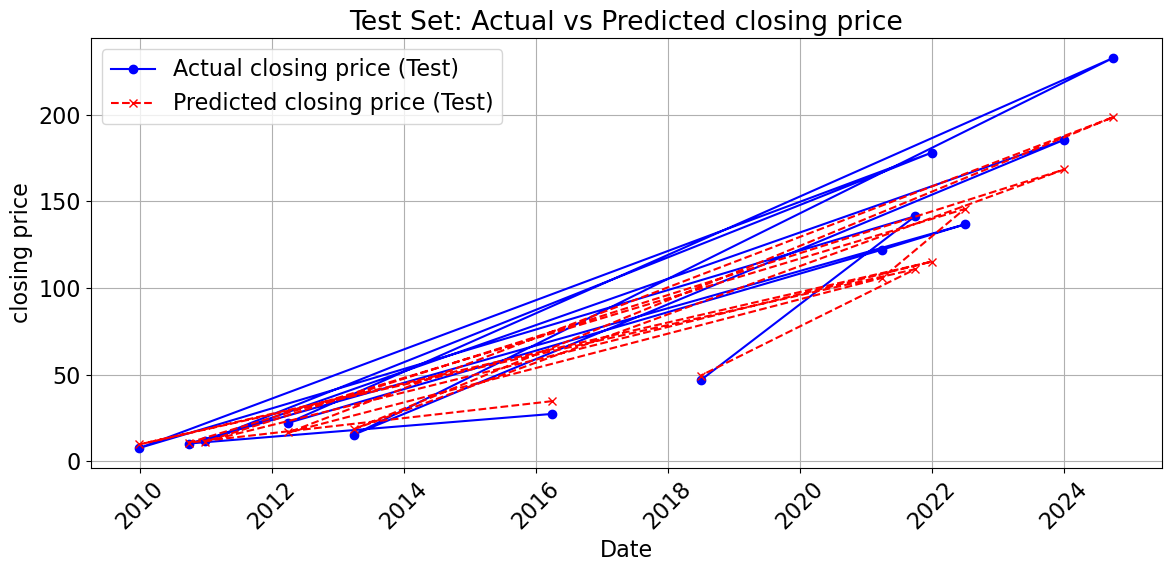

Validation MSE (log scale): 0.015
Test MSE (log scale): 0.040


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_svm, scaler, X_val, X_test, y_val_log, y_test_log are from your grid search
# Predict on validation and test sets
y_val_pred_log = best_svm.predict(X_val_scaled)
y_test_pred_log = best_svm.predict(X_test_scaled)

# Convert back to original scale
y_val_pred = np.expm1(y_val_pred_log)
y_test_pred = np.expm1(y_test_pred_log)
y_val_actual = np.expm1(y_val_log)
y_test_actual = np.expm1(y_test_log)

# Get corresponding dates (assuming final_data is indexed consistently with splits)
val_indices = X_val.index  # Indices from the split
test_indices = X_test.index
val_dates = final_data.loc[val_indices, 'date']
test_dates = final_data.loc[test_indices, 'date']

# Plot Validation Set
plt.figure(figsize=(12, 6))
plt.plot(val_dates, y_val_actual, label='Actual closing price (Validation)', color='blue', marker='o')
plt.plot(val_dates, y_val_pred, label='Predicted closing price (Validation)', color='red', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('closing price')
plt.title('Validation Set: Actual vs Predicted closing price (MSE = 0.25 log scale)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Test Set
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_actual, label='Actual closing price (Test)', color='blue', marker='o')
plt.plot(test_dates, y_test_pred, label='Predicted closing price (Test)', color='red', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('closing price')
plt.title('Test Set: Actual vs Predicted closing price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print MSE for reference (assuming 0.25 was your latest log-scale validation MSE)
print(f"Validation MSE (log scale): {mean_squared_error(y_val_log, y_val_pred_log):.3f}")
print(f"Test MSE (log scale): {mean_squared_error(y_test_log, y_test_pred_log):.3f}")

In [ ]:
Validation MSE (log scale): 0.015
Test MSE (log scale): 0.040
corrScores = []
for i in range(42, 69):
    stock = techTickers[i]
    print(stock)
    aaplartURL = 'https://swamplocksapi.azurewebsites.net/api/Financials/stocks/'+ stock +'/articles'
    r = requests.get(aaplartURL)
    #print(r.json())
    dfa = pd.DataFrame(r.json())

    dfa['date'] = pd.to_datetime(dfa['date']).dt.date

    # Step 2: Group by the 'date' and calculate the mean of 'sentimentScore'
    grouped = dfa.groupby('date')['sentimentScore'].mean()

    # Step 3: Sort by date
    sorted_grouped = grouped.sort_index()

    # Step 4: Display the results
    #for date, avg_sentiment in sorted_grouped.items():
        #print(f"Date: {date}, Average Sentiment Score: {avg_sentiment}")
    r = requests.get('https://swamplocksapi.azurewebsites.net/api/Financials/stocks/'+ stock +'/filtered_data')
    dfAAPLclose = pd.DataFrame(r.json())
    dfAAPLclose['date'] = pd.to_datetime(dfAAPLclose['date'])

    # Sort by date to ensure proper ordering
    dfAAPLclose = dfAAPLclose.sort_values('date')

    # Plotting the closing prices
    """
    plt.figure(figsize=(12, 6))
    plt.plot(dfAAPLclose['date'], dfAAPLclose['closingPrice'], marker='o', linestyle='-', color='blue', label='Closing Price', markersize=0.5)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('AAPL Closing Prices Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    """
    #print(merged_df[['date', 'fiscalYear', 'closingPrice', 'commonStockSharesOutstanding', 'marketCap']].to_string(index=False))
    date_closing_price_df = merged_df[['date', 'closingPrice']]
    #print(date_closing_price_df)
    # ----- Step 1: Create DataFrame for Sentiment Data ----- #
    # Assume sorted_grouped is a dictionary like:
    # { '2022-12-04': -0.01285714285714286, ..., '2025-04-02': 0.19615384615384615 }
    sentiment_data = pd.DataFrame(list(sorted_grouped.items()), columns=['date', 'avg_sentiment'])
    sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

    # ----- Step 2: Prepare the Closing Price Data ----- #
    # Ensure the date column is datetime in date_closing_price_df
    #date_closing_price_df['date'] = pd.to_datetime(date_closing_price_df['date'])

    # ----- Step 3: Merge the Two DataFrames on Date ----- #
    merged_corr = pd.merge(sentiment_data, date_closing_price_df, on='date', how='inner')
    #print("Merged Data Sample:")
    #print(merged_corr.head())
    pearson_corr = merged_corr['avg_sentiment'].corr(merged_corr['closingPrice'])
    spearman_corr = merged_corr['avg_sentiment'].corr(merged_corr['closingPrice'], method='spearman')
    corrScores.append((stock, pearson_corr, spearman_corr))
print(corrScores)

In [ ]:
averageP = sum(tup[1] for tup in corrScores) / len(corrScores)
averageS = sum(tup[2] for tup in corrScores) / len(corrScores)
print(averageP, averageS)


In [ ]:
print(len(techTickers))

In [ ]:
# 0-10  0.1699277228915113 0.16258807300622627
# 15-25 0.07532837904928663 0.07747398939046904
# 25-40 0.1621833532404117 0.17131667370883086
# to 69 0.15801448917915326 0.17114285622441744
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Create DataFrame for Sentiment Data ----- #
# Assume sorted_grouped is a dictionary like:
# { '2022-12-04': -0.01285714285714286, ..., '2025-04-02': 0.19615384615384615 }
sentiment_data = pd.DataFrame(list(sorted_grouped.items()), columns=['date', 'avg_sentiment'])
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

# ----- Step 2: Prepare the Closing Price Data ----- #
# Ensure the date column is datetime in date_closing_price_df
#date_closing_price_df['date'] = pd.to_datetime(date_closing_price_df['date'])

# ----- Step 3: Merge the Two DataFrames on Date ----- #
merged_corr = pd.merge(sentiment_data, date_closing_price_df, on='date', how='inner')
print("Merged Data Sample:")
print(merged_corr.head())

In [ ]:


# ----- Step 4: Calculate Correlation Metrics ----- #
pearson_corr = merged_corr['avg_sentiment'].corr(merged_corr['closingPrice'])
spearman_corr = merged_corr['avg_sentiment'].corr(merged_corr['closingPrice'], method='spearman')

print(f"\nPearson Correlation: {pearson_corr:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}")
"""
# ----- Step 5: Plotting ----- #
# Scatter Plot with Regression Line
plt.figure(figsize=(10,6))
sns.regplot(x='avg_sentiment', y='closingPrice', data=merged_corr, ci=None, scatter_kws={'s':50})
plt.title("Scatter Plot: Average Sentiment vs. Closing Price")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Closing Price")
plt.show()

# Time Series Plot: Both Sentiment and Closing Price
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(merged_corr['date'], merged_corr['avg_sentiment'], 'b-', label="Avg Sentiment")
ax1.set_xlabel("Date")
ax1.set_ylabel("Average Sentiment Score", color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(merged_corr['date'], merged_corr['closingPrice'], 'r-', label="Closing Price")
ax2.set_ylabel("Closing Price", color='r')
ax2.tick_params('y', colors='r')
plt.title("Time Series: Average Sentiment & Closing Price")
fig.tight_layout()
plt.show()

# Correlation Heatmap
corr_matrix = merged_corr[['avg_sentiment', 'closingPrice']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()
"""

In [ ]:
# ✅ Ensure datetime consistency
dfis['fiscalDateEnding'] = pd.to_datetime(dfis['fiscalDateEnding'])
df_closing_price['date'] = pd.to_datetime(df_closing_price['date'])

# ✅ Create next quarter end date
dfis['nextQuarterEnd'] = dfis['fiscalDateEnding'] + pd.DateOffset(months=3)

# ✅ Sort both DataFrames by date
dfis = dfis.sort_values('nextQuarterEnd')
df_closing_price = df_closing_price.sort_values('date')

# ✅ Use merge_asof with tolerance to avoid incorrect repeated mapping
final_data = pd.merge_asof(
    dfis,
    df_closing_price,
    left_on='nextQuarterEnd',
    right_on='date',
    direction='forward',
    tolerance=pd.Timedelta("30 days")  # Allow up to 30 days difference
)

# ✅ Filter out mismatched rows (NaNs)
final_data = final_data.dropna(subset=['closingPrice']).reset_index(drop=True)

# ✅ Check results
print("\nFinal merged data sample:")
print(final_data[['fiscalDateEnding', 'nextQuarterEnd', 'date', 'closingPrice']].head())
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = final_data.drop(columns=['closingPrice', 'fiscalDateEnding', 'nextQuarterEnd', 'date'])
y = final_data['closingPrice']

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ✅ Display the shapes of the resulting sets
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Shift closing price backward by one quarter (3 months)
final_data['closingPrice_next_quarter'] = final_data['closingPrice'].shift(-1)

# ✅ Drop rows where the shifted closing price is NaN (last row will be NaN)
final_data = final_data.dropna(subset=['closingPrice_next_quarter']).reset_index(drop=True)

# ✅ Define features (excluding dates)
X_future = final_data.drop(columns=['closingPrice', 'closingPrice_next_quarter', 'fiscalDateEnding', 'nextQuarterEnd', 'date'])
y_future = final_data['closingPrice_next_quarter']

# ✅ Create correlation matrix
data_with_future_target = X_future.copy()
data_with_future_target['closingPrice_next_quarter'] = y_future
correlation_matrix_future = data_with_future_target.corr()

# ✅ Plot correlation heatmap
plt.figure(figsize=(40, 32))
sns.heatmap(
    correlation_matrix_future, 
    annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f'
)
plt.title('Correlation Heatmap of Features with Future Closing Price')
plt.show()

# ✅ Print top correlated factors with future stock price
print("Top correlated factors with future stock price:")
print(correlation_matrix_future['closingPrice_next_quarter'].sort_values(ascending=False))


In [ ]:
import matplotlib.pyplot as plt

# Define the top 5 features based on your correlation analysis
top_features = [
    'researchAndDevelopment', 
    'operatingExpenses', 
    'sellingGeneralAndAdministrative', 
    'nonInterestIncome', 
    'grossProfit'
]

# Ensure that final_data contains a datetime 'date' column, 'closingPrice',
# and all the top_features.
# For example, final_data might look like:
#   date         closingPrice   researchAndDevelopment   operatingExpenses  ...
#   2010-09-30   123.45         0.123                    456.78             ...
#   ...

# Create a figure with 5 subplots, one for each top feature
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 25), sharex=True)

for ax, feature in zip(axes, top_features):
    # Plot closing price on primary y-axis (blue)
    ax.plot(final_data['date'], final_data['closingPrice'], color='blue', label='Closing Price')
    ax.set_ylabel('Closing Price', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_title(f"Closing Price and {feature} Over Time")
    
    # Plot the feature on the secondary y-axis (red)
    ax2 = ax.twinx()
    ax2.plot(final_data['date'], final_data[feature], color='red', label=feature)
    ax2.set_ylabel(feature, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Combine legends from both axes
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the x-axis label on the bottom subplot
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the top 16 correlated features with closing price
top_features = [
    'researchAndDevelopment', 'operatingExpenses', 'sellingGeneralAndAdministrative', 
    'nonInterestIncome', 'grossProfit', 'totalRevenue', 'ebitda', 'operatingIncome', 
    'ebit', 'incomeBeforeTax', 'costOfRevenue', 'costOfGoodsAndServicesSold', 
    'netIncome', 'comprehensiveIncomeNetOfTax', 'netIncomeFromContinuingOperations', 
    'depreciationAndAmortization'
]

# Create figure with 16 subplots (one per feature)
fig, axes = plt.subplots(nrows=16, ncols=1, figsize=(15, 80), sharex=True)

for ax, feature in zip(axes, top_features):
    # Plot closing price on primary y-axis (blue)
    ax.plot(final_data['date'], final_data['closingPrice'], color='blue', label='Closing Price')
    ax.set_ylabel('Closing Price', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_title(f"Closing Price and {feature} Over Time")

    # Plot the feature on the secondary y-axis (red)
    ax2 = ax.twinx()
    ax2.plot(final_data['date'], final_data[feature], color='red', label=feature)
    ax2.set_ylabel(feature, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Combine legends from both axes
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the x-axis label on the bottom subplot
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()
